# Exploratory Data Analysis

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler


# Load CSV files
df = pd.read_csv('/Users/abhaychaudhary/Desktop/engineered_dataset.csv')

In [20]:
df.head()

,ZIP Code,FAIR Plan Units,% FAIR Plan Units,Total Exposure ($),% Change - Claims (Fire and Smoke),% Change - Earned Premiums,% Change - Expiring Policies,% Change - Losses (Fire and Smoke),% Change - New Policies,% Change - Nonrenewed Policies,...,Growth in Losses to All Disasters 10yr Ratio,Growth in Losses to Fire Disasters 3yr Ratio,Growth in Losses to Fire Disasters 5yr Ratio,Growth in Losses to Fire Disasters 10yr Ratio,Premium to Exposure Ratio,Nonrenewal Rate,Loss Burden per Unit,Loss Burden per Exposure,Premium Adequacy,Renewal Resilience
0,90001,2104.0,0.233337,532891886.0,0.283333,0.460404,0.041044,-0.352704,0.311178,0.223127,...,-0.117568,-0.176352,-0.176352,-0.117568,1664.095930,0.114211,461.081624,461.081624,3.609114,0.885789
1,90002,1330.0,0.169125,391005676.0,-0.357143,0.266116,0.068268,-0.595781,0.107656,0.249296,...,-0.198594,-0.297891,-0.297891,-0.198594,1950.190615,0.124415,482.429044,482.429044,4.042440,0.875585
2,90003,1934.0,0.181596,517188602.0,1.333333,0.304515,0.083827,0.990114,0.152686,0.266522,...,0.330038,0.495057,0.495057,0.330038,1929.540000,0.128495,405.017840,405.017840,4.764086,0.871505
3,90004,495.0,0.095101,191648836.0,-0.083333,0.343416,0.014250,0.725764,0.157895,0.174603,...,0.241921,0.362882,0.362882,0.241921,7609.147935,0.119971,637.195965,637.195965,11.941613,0.880029
4,90005,100.0,0.091241,54169330.0,-0.142857,0.383152,0.015707,10.788063,0.016000,0.115702,...,3.596021,5.394031,5.394031,3.596021,12468.743613,0.131661,808.096715,808.096715,15.429766,0.868339


### 1. Basic Information about Data

In [21]:

print("Data Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum().sort_values(ascending=False).head(10))
print("\nSummary Stats:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 76 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ZIP Code                                                 1165 non-null   int64  
 1   FAIR Plan Units                                          1165 non-null   float64
 2   % FAIR Plan Units                                        1165 non-null   float64
 3   Total Exposure ($)                                       1165 non-null   float64
 4   % Change - Claims (Fire and Smoke)                       1165 non-null   float64
 5   % Change - Earned Premiums                               1165 non-null   float64
 6   % Change - Expiring Policies                             1165 non-null   float64
 7   % Change - Losses (Fire and Smoke)                       1165 non-null   float64
 8   % Change - New Policies     

### 2. Handling Outliers

In [22]:

# Define function to remove outliers using Z-score
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]
# Save original shape for comparison
original_shape = df.shape
df_clean = remove_outliers_zscore(df)
print(f"\nOutlier Removal:\nOriginal shape: {original_shape}, New shape: {df_clean.shape}")


Outlier Removal:
Original shape: (1165, 76), New shape: (876, 76)


### 3. Check Distributions of Target Variables

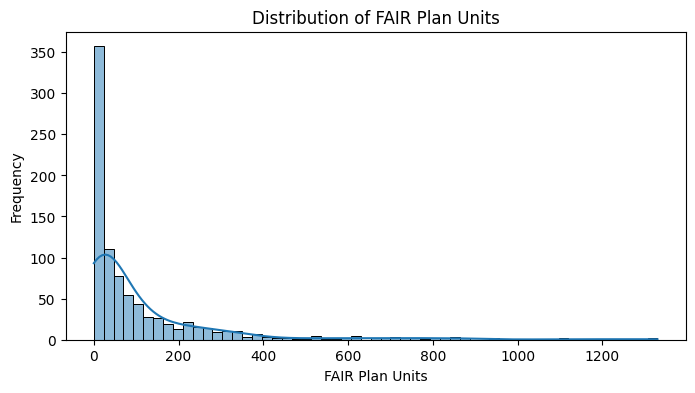

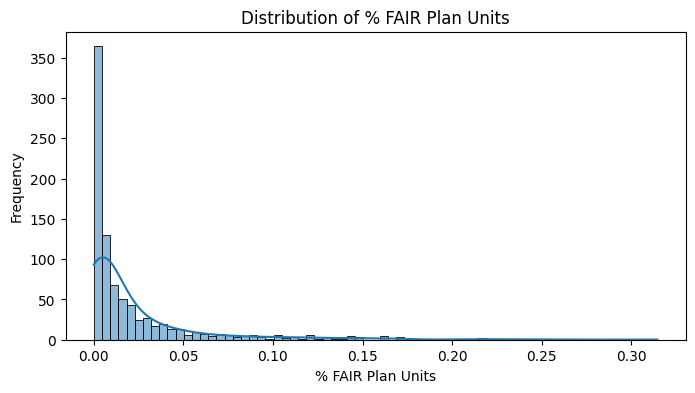

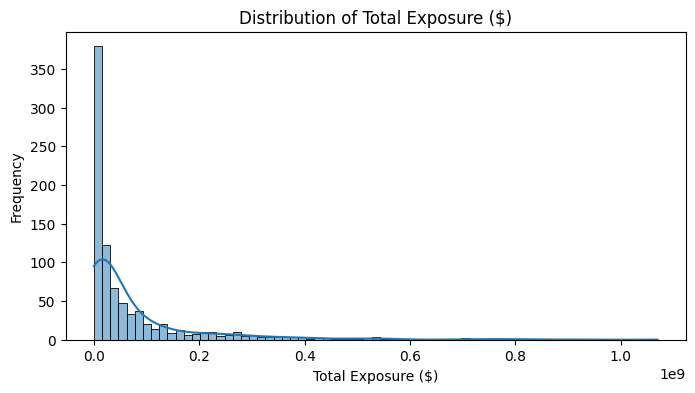

In [23]:

target_vars = ['FAIR Plan Units', '% FAIR Plan Units', 'Total Exposure ($)']

for col in target_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### 4. Correlation Heatmap

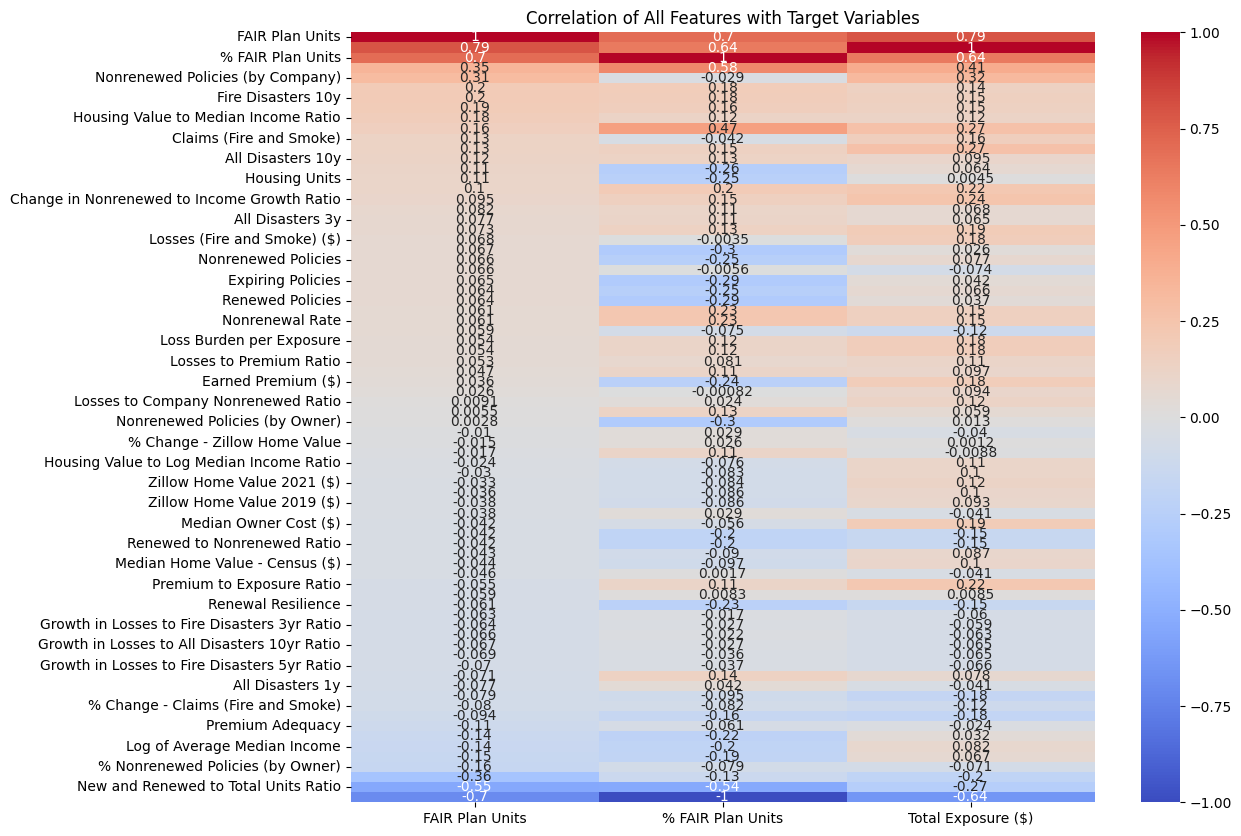

In [24]:

# Correlation with targets
corr_matrix = df_clean.corr()

# Show only correlations with target variables
target_corr = corr_matrix[target_vars].sort_values(by=target_vars[0], ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(target_corr, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation of All Features with Target Variables')
plt.show()



### 5. Pairplot of Strongest Correlators

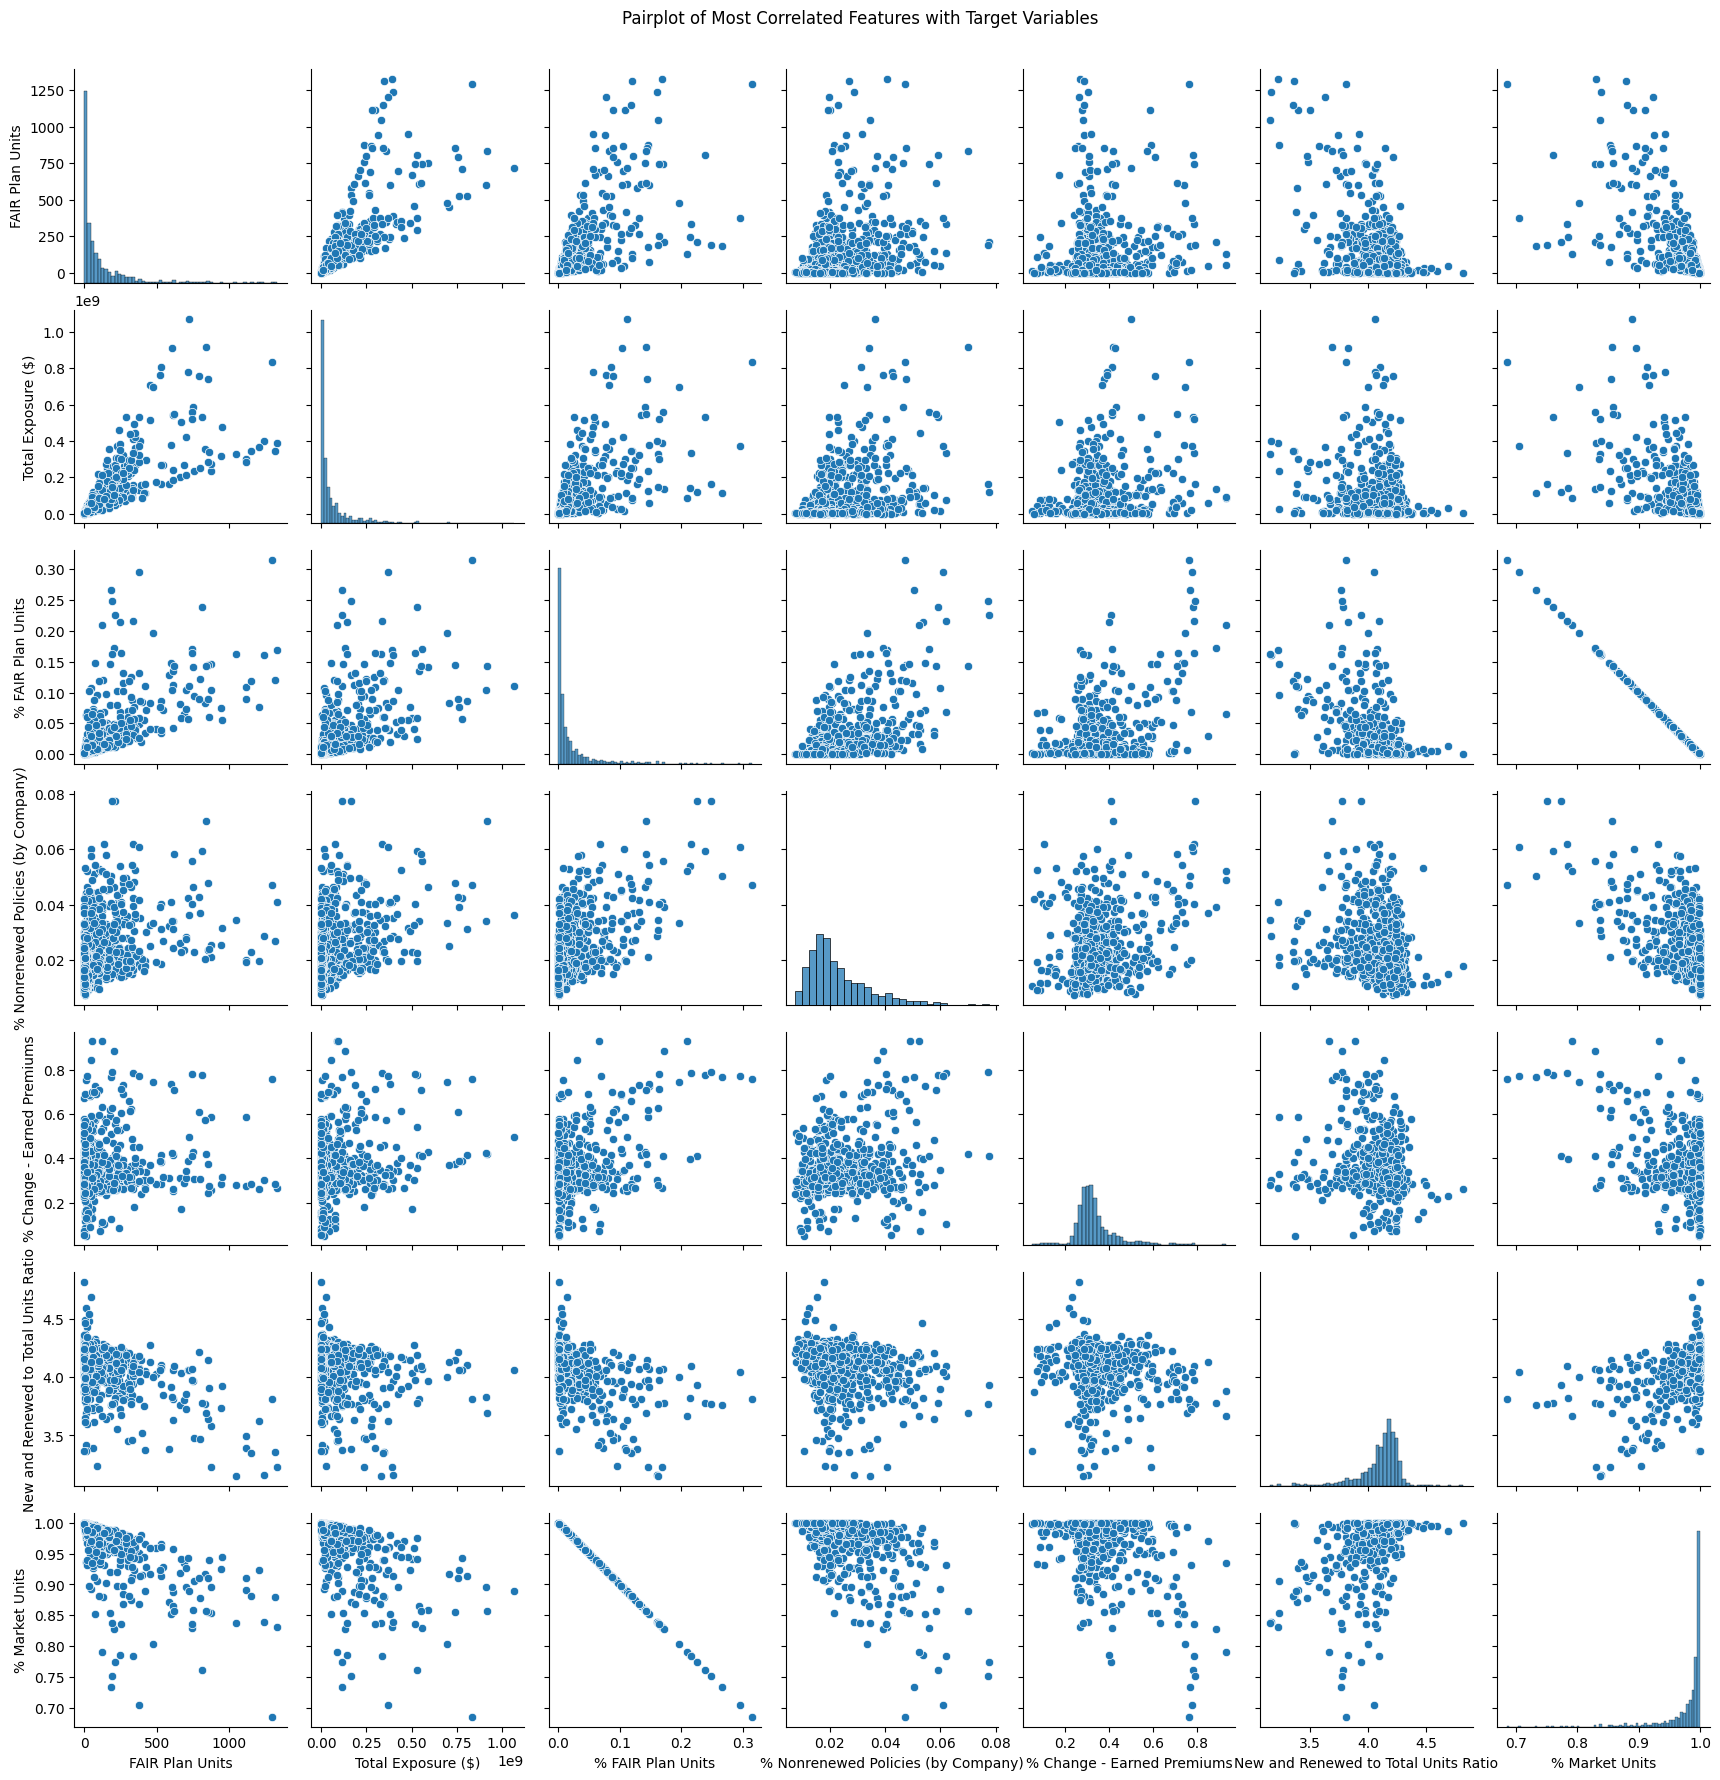

In [25]:

# Select top features correlated with FAIR Plan Units (threshold example: > 0.4 abs corr)
correlated_features = target_corr[
    (target_corr[target_vars[0]].abs() > 0.4) |
    (target_corr[target_vars[1]].abs() > 0.4) |
    (target_corr[target_vars[2]].abs() > 0.4)
].index.tolist()

# Ensure target variables are in the list
for var in target_vars:
    if var not in correlated_features:
        correlated_features.append(var)

sns.pairplot(df_clean[correlated_features])
plt.suptitle("Pairplot of Most Correlated Features with Target Variables", y=1.02)
plt.show()

### 6. Feature Distributions and Relationships

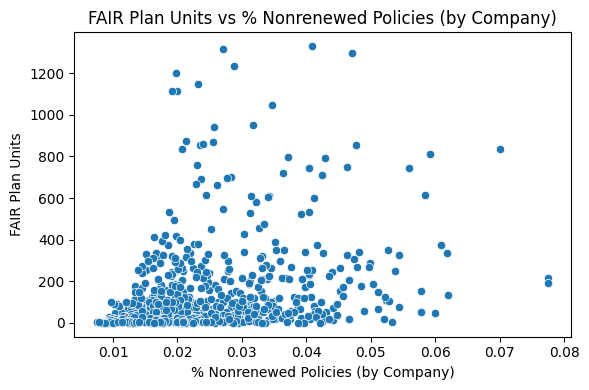

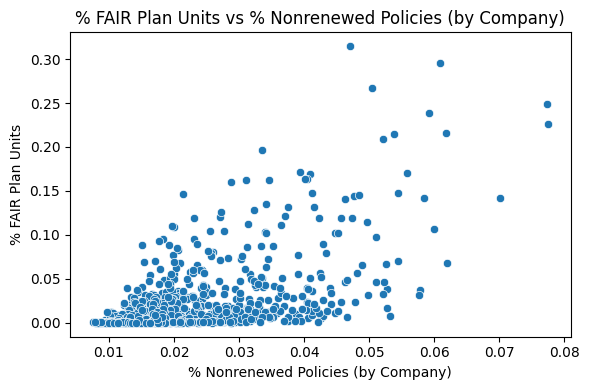

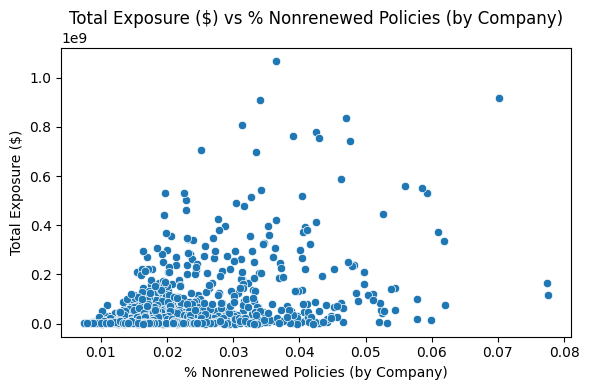

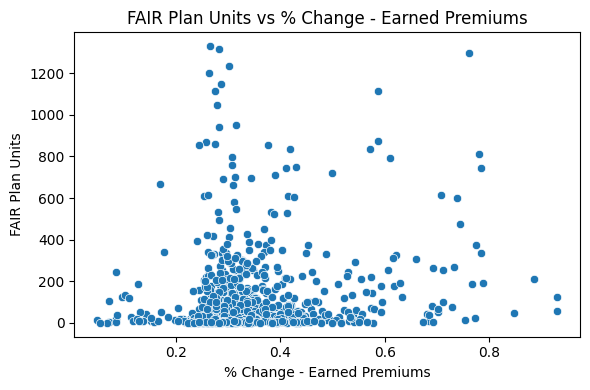

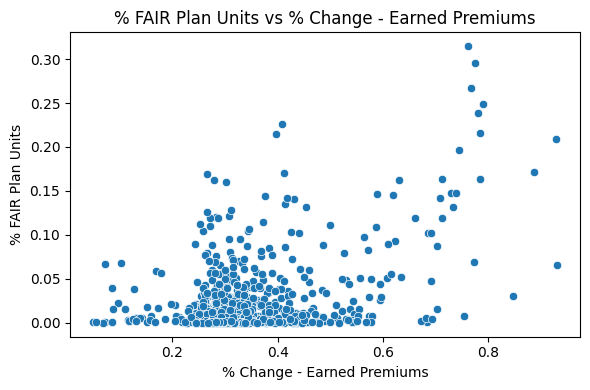

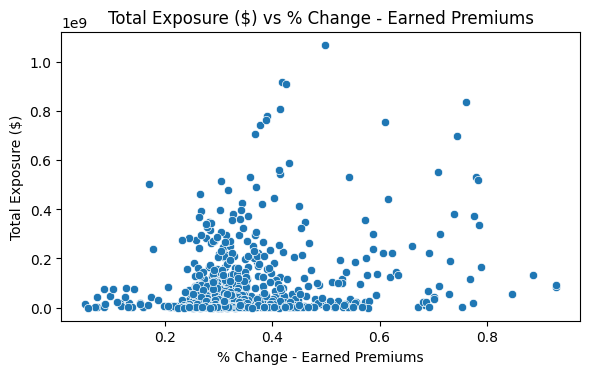

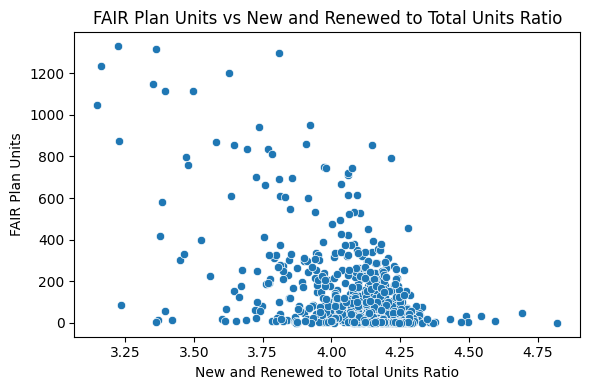

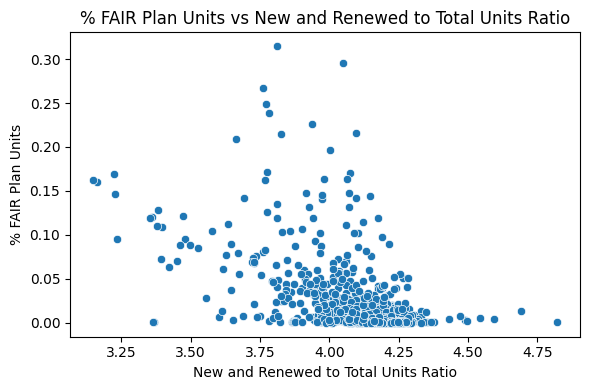

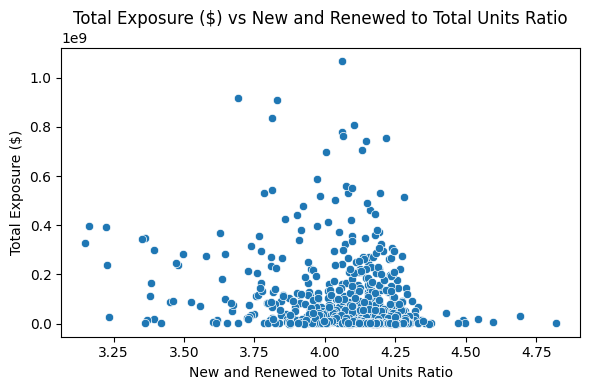

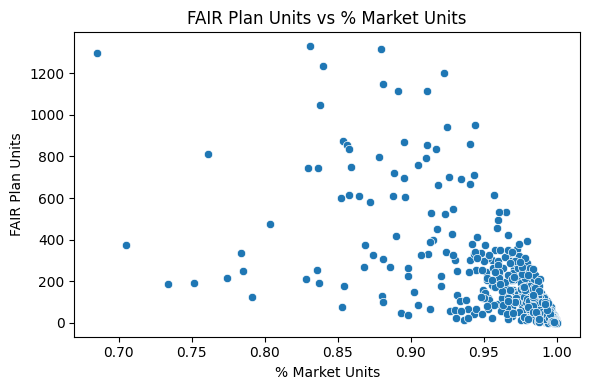

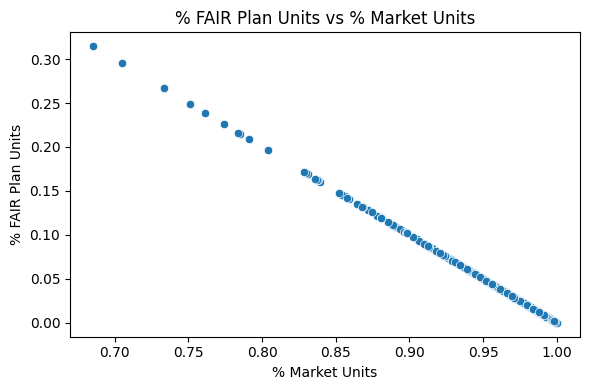

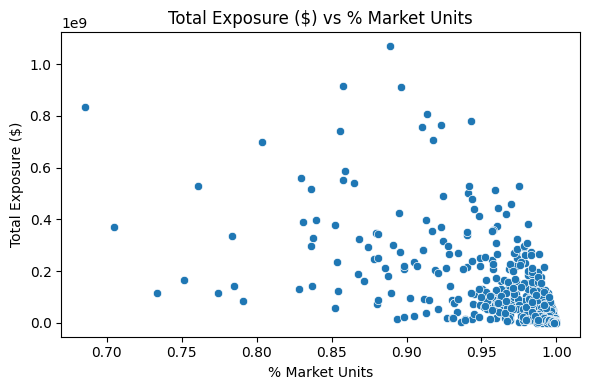

In [26]:

# Boxplots and scatter plots for top N features against target
top_features = correlated_features.copy()
top_features.remove('FAIR Plan Units') if 'FAIR Plan Units' in top_features else None
top_features.remove('% FAIR Plan Units') if '% FAIR Plan Units' in top_features else None 
top_features.remove('Total Exposure ($)') if 'Total Exposure ($)' in top_features else None 

for feature in top_features[:10]:  # Limiting to top 10 for visualization
    for target in target_vars:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df_clean, x=feature, y=target)
        plt.title(f'{target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

### 7. Feature Importance using Random Forest

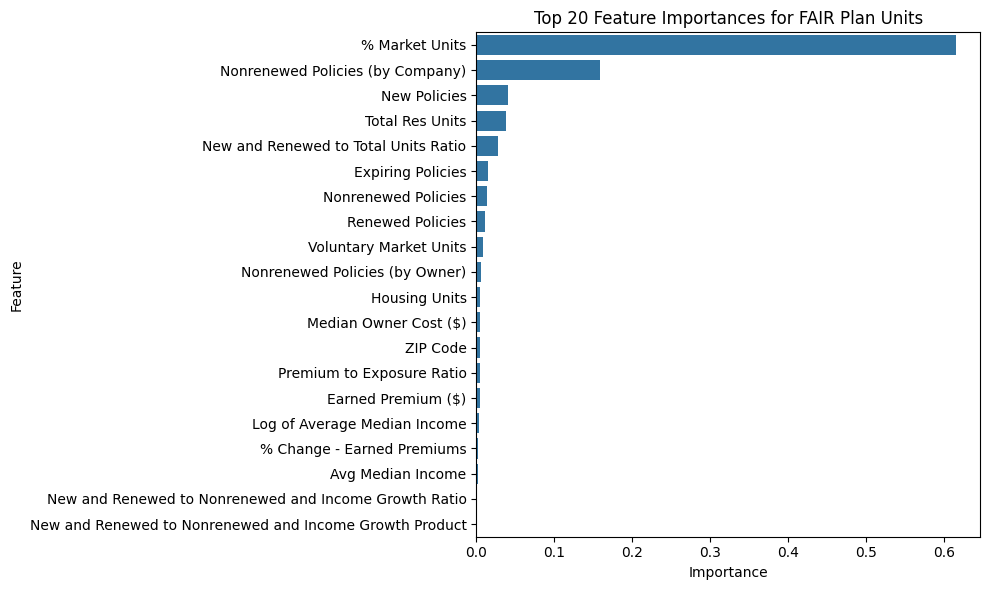

In [27]:

from sklearn.ensemble import RandomForestRegressor

# Drop non-numeric columns (like 'Income Bin') before scaling
X = df_clean.drop(columns=target_vars)

# Keep only numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# Scale numeric features
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_numeric), columns=X_numeric.columns)

# Proceed with model
y = df_clean['FAIR Plan Units']

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(X_scaled, y)

importances = pd.Series(model.feature_importances_, index=X_numeric.columns)
top_importances = importances.sort_values(ascending=False).head(20)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances.values, y=top_importances.index)
plt.title('Top 20 Feature Importances for FAIR Plan Units')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
